# 0 . Import Libraries

In [1]:
###### Data Analysis
import pandas as pd
import numpy as np

###### EDA
import matplotlib.pyplot as plt
import seaborn as sns 

###### Clustering
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.target import FeatureCorrelation

###### Dimensionality Reduction 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

###### To measure the distance b/w users likings with the existing database
from sklearn.preprocessing import normalize

###### Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Data Analysis

### 1.1 - Read Data

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')
columns = df.columns[1:]
print(columns)

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


In [3]:
print(f"Before duplicates removal: {df.shape}")
print(f"After duplicates removal : {df.drop_duplicates().shape}")

print(f"Duplicates Found : {df.shape[0] - df.drop_duplicates().shape[0]}")

Before duplicates removal: (1610, 18)
After duplicates removal : (1610, 18)
Duplicates Found : 0


In [4]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


<u>DATA SUMMARY :

``` 
Number of features : Total 17 columns, 
Number of records  : 1610,
Non Null records   : 1610,
Null records       : 0,
dtypes             : float64(9), int64(3), object(5),
memory usage       : 214.0+ KB

```

### 1.2 - Descriptive Data Analysis

In [5]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


<u> DESCRIPTIVE SUMMARY : </u>

``` Errors  : 0 Errors in the data,. I can consolidate it to get mean, median, Q's (No, erraneous entry) ```

<ol>

<u>Track number</u>: ```75% of the tracks have <= 11 songs```

<u>Acousticness</u>: ```75% of the tracks have <= 0.403750 confidence of acoustic, meaning 75% aren't highly acoustic```

<u>Dancability</u>: ```75% of the tracks have <= 0.578000 confidence of being danceable, meaning 75% of the population's danceable range from no dance to moderate dance```

<u>Energy</u>: ```75% of the tracks have <= 0.945000 confidence of being energetic, meaning 75% of the population ranges from slow and quiet to fast and noisy```

<u>Instrumentalness</u>: ```75% of the tracks have <= 0.179000, meaning 75% of the content contains vocals (from no vocal to rap/spoken words)```

<u>Liveness</u>: ```75% of the tracks have <= 0.8, indicating a mixture of all ranges (from no live to high liveness)```

<u>Loudness</u>: ```25%-75% of the tracks have a loudness range of (-8.982500, -4.608750) which is >= 0, indicating low loudness in the context of songs```

<u> Speechiness</u> : ```25%-75% of the tracks are music and other non-speech-like tracks.```

<u> Tempo </u> : ```25% -75% of the tracks are in the range of (107 - 142) at BPM```

<u> Valence </u> : ```25% - 75% of the tracks are (0.40 - 0.70) normal to cheerfull range```

<u> Popularity </u> : ```75% of the tracks are less popular (13-27)```

<u> Duration (ms) </u> :   ```25% - 75% of the tracks are ends in 13-27 mill seconds.```
</ol>

### 1.3 - Inferential Data Analysis

In [6]:
# Calculate the values to be binned
numbers = df['popularity'].values / 10
min_val = 0
max_val = 8

# Create bins
bins = np.linspace(min_val, max_val, num=8)

# Bin the numbers
binned_numbers = np.digitize(numbers, bins)

# Count the occurrences of each bin
bin_counts = np.bincount(binned_numbers)

# Calculate the percentage of each bin in the total population
bin_percentages = bin_counts / len(numbers) * 100

prev=0
perc=0

print("Bin Percentages:")
for bin_num, percentage in enumerate(bin_percentages[1:], start=1):
    print(f"\tBin {prev+1}-{bin_num*10}: {percentage:.2f}%, \tTotal - {round(perc+percentage, 2)}%")
    prev = bin_num*10
    perc += percentage
    
print(f"\n88% of the population are in the range of : 0 - 30 popularity range")
print(f"High popular songs are rare in the dataset")

Bin Percentages:
	Bin 1-10: 21.55%, 	Total - 21.55%
	Bin 11-20: 39.01%, 	Total - 60.56%
	Bin 21-30: 27.20%, 	Total - 87.76%
	Bin 31-40: 8.82%, 	Total - 96.58%
	Bin 41-50: 2.30%, 	Total - 98.88%
	Bin 51-60: 0.56%, 	Total - 99.44%
	Bin 61-70: 0.50%, 	Total - 99.94%
	Bin 71-80: 0.06%, 	Total - 100.0%

88% of the population are in the range of : 0 - 30 popularity range
High popular songs are rare in the dataset


### 1.4 Data Cleaning, Binning & Scaling

In [7]:
def chunk_into_bins(numbers):

    # Determine the minimum and maximum values
    min_val = min(numbers)
    max_val = max(numbers)

    # Calculate the bin width
    bin_width = (max_val - min_val) / 10

    # Chunk the numbers into bins
    binned_numbers = [(num - min_val) // bin_width for num in numbers]

    return binned_numbers

def normalize_df(df):
    
    # Min-Max scaling
    normalized_df = (df - df.min()) / (df.max() - df.min())

    return normalized_df

In [8]:
df1 = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']]

for col in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']:
    df1[col] = chunk_into_bins(df1[col])
    # print(df1[col].nunique())
    
df1 = normalize_df(df1)

### 1.5 - Outlier Analysis 

In [9]:
import plotly.graph_objects as go

def plot_dbscan_tsne_3d_plotly(df, eps=0.5, min_samples=5, random_state=2):
    """
    Perform DBSCAN clustering on the input DataFrame and visualize the clusters using t-SNE in an interactive 3D plot with Plotly.

    Parameters:
    - df (DataFrame): Input DataFrame with features for clustering.
    - eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    - min_samples (int): The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
    - random_state (int): Random seed for reproducibility.
    """

    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df)

    # t-SNE for dimensionality reduction
    tsne = TSNE(n_components=3, random_state=random_state)
    tsne_data = tsne.fit_transform(df)

    # Create DataFrame for t-SNE data and clusters
    tsne_df = pd.DataFrame({
        'tsne1': tsne_data[:, 0],
        'tsne2': tsne_data[:, 1],
        'tsne3': tsne_data[:, 2],
        'cluster': clusters
    })

    # Create traces for each cluster
    traces = []
    for cluster in np.unique(clusters):
        clustered_data = tsne_df[tsne_df['cluster'] == cluster]
        trace = go.Scatter3d(
            x=clustered_data['tsne1'],
            y=clustered_data['tsne2'],
            z=clustered_data['tsne3'],
            mode='markers',
            marker=dict(size=4, opacity=0.8),
            name=f'Cluster {cluster}'
        )
        traces.append(trace)

    # Create layout
    layout = go.Layout(
        title='DBSCAN Clustering with t-SNE Visualization (3D)',
        scene=dict(
            xaxis=dict(title='t-SNE Dimension 1'),
            yaxis=dict(title='t-SNE Dimension 2'),
            zaxis=dict(title='t-SNE Dimension 3')
        )
    )

    # Plot using Plotly
    fig = go.Figure(data=traces, layout=layout)
    fig.show()
    
    return clusters

# Example usage:
# Assuming df is your DataFrame containing the features for clustering
# plot_dbscan_tsne_3d_plotly(df)


In [10]:
clusters = plot_dbscan_tsne_3d_plotly(df1)

In [11]:
# List to store the indices of elements with values -1 or 1
indices_of_outliers = []

# Iterate over the array and check each element
for i, value in enumerate(clusters):
    if value == -1 or value == 1:
        indices_of_outliers.append(i)
        
df1.iloc[indices_of_outliers]['popularity'].value_counts().reset_index(name='count').rename(columns={'index':'popularity'}).sort_values(['popularity'])

,popularity,count
1,0.0,10
0,0.1,12
3,0.2,7
2,0.3,7
4,0.4,4
6,0.5,1
5,1.0,1


<u> OUTLIER ANALYSIS - SUMMARY </u>

```
As per the DB scan algorithm It clusters the anlomaly datapoints. Even, The t-SNE 3D plot also confirms the same.

But, In my previous analysis we found that high popular songs only a few songs. highly rated songs might have the same or common (quality / technical features) (music) that interests users. if we remove the anomaly's then it may remove the highly popular songs & diversity in the dataset.

    User Preferences and Diversity: Users have diverse preferences, and what constitutes valuable or interesting content can vary significantly among individuals. While popular content may appeal to a broad audience, there is also value in recommending unique or niche content that caters to specific tastes and interests. Removing anomaly data points solely based on their deviation from the norm may overlook valuable content that could be appreciated by certain user segments.

    Serendipitous Discoveries: Anomaly data points, representing unique or unusual content, can lead to serendipitous discoveries and enrich the user experience by introducing users to content they may not have encountered otherwise. By embracing diversity and novelty in recommendations, recommendation systems can facilitate exploration and discovery, enhancing user engagement and satisfaction.

    Balancing Popularity and Uniqueness: While popularity can be an indicator of content relevance and appeal to a large audience, it's essential to strike a balance between recommending popular content and promoting diversity and uniqueness. Incorporating anomaly data points into the recommendation process can help achieve this balance by ensuring that users are exposed to a variety of content that spans different popularity levels and genres.

```

# 2.0 - EDA

### 2.1 - Identify the Feature Importance with the target

In [12]:
df['year'] = pd.to_datetime(df['release_date']).dt.year

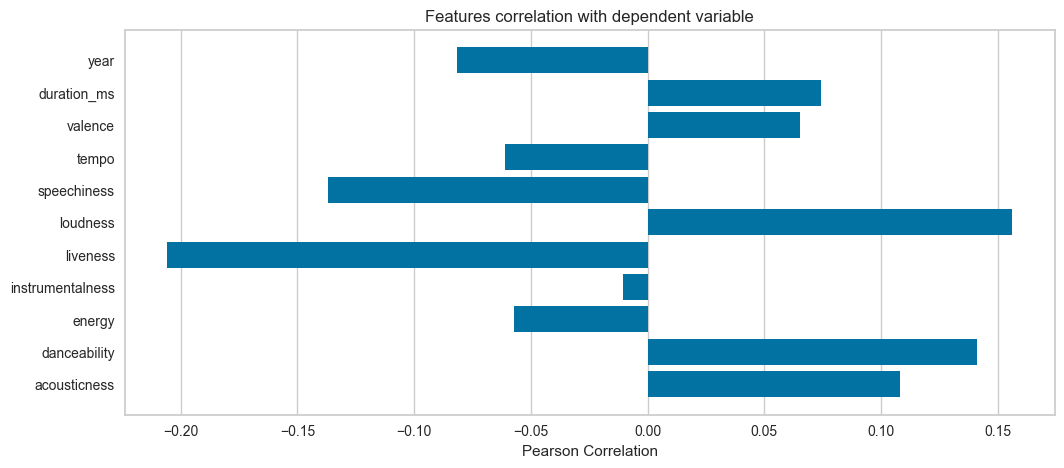

In [13]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(12,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show();

<u> OUTLIER ANALYSIS - SUMMARY </u>
```
Danceability, Liveness, Acoustincess & Loudness are the high correlated features with the popularity.
```

### 2.2 - Songs count over the Decades

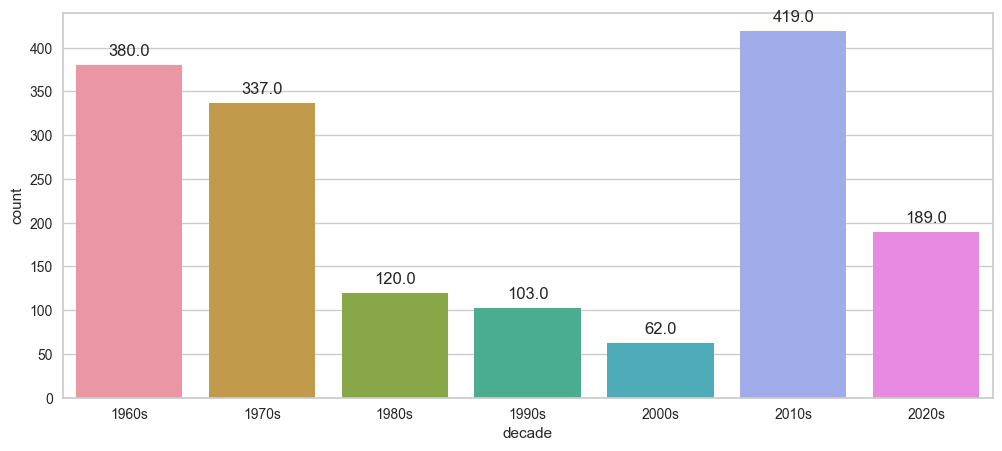

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

plt.rcParams['figure.figsize']=(12,5)
ax = sns.barplot(data=df['decade'].value_counts().sort_index().reset_index().rename(columns={'decade':'count', 'index':'decade'}), x='decade', y='count')

# Annotating each bar with its count value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<u>OBSERVATION :</u>

```
Number of songs over the decades got decreased untill 2000's
Since 2000, It's gradually in upward trend.
```

### 2.3 - Features of songs and identify the pattern.

#### Yearly Quantile Plot

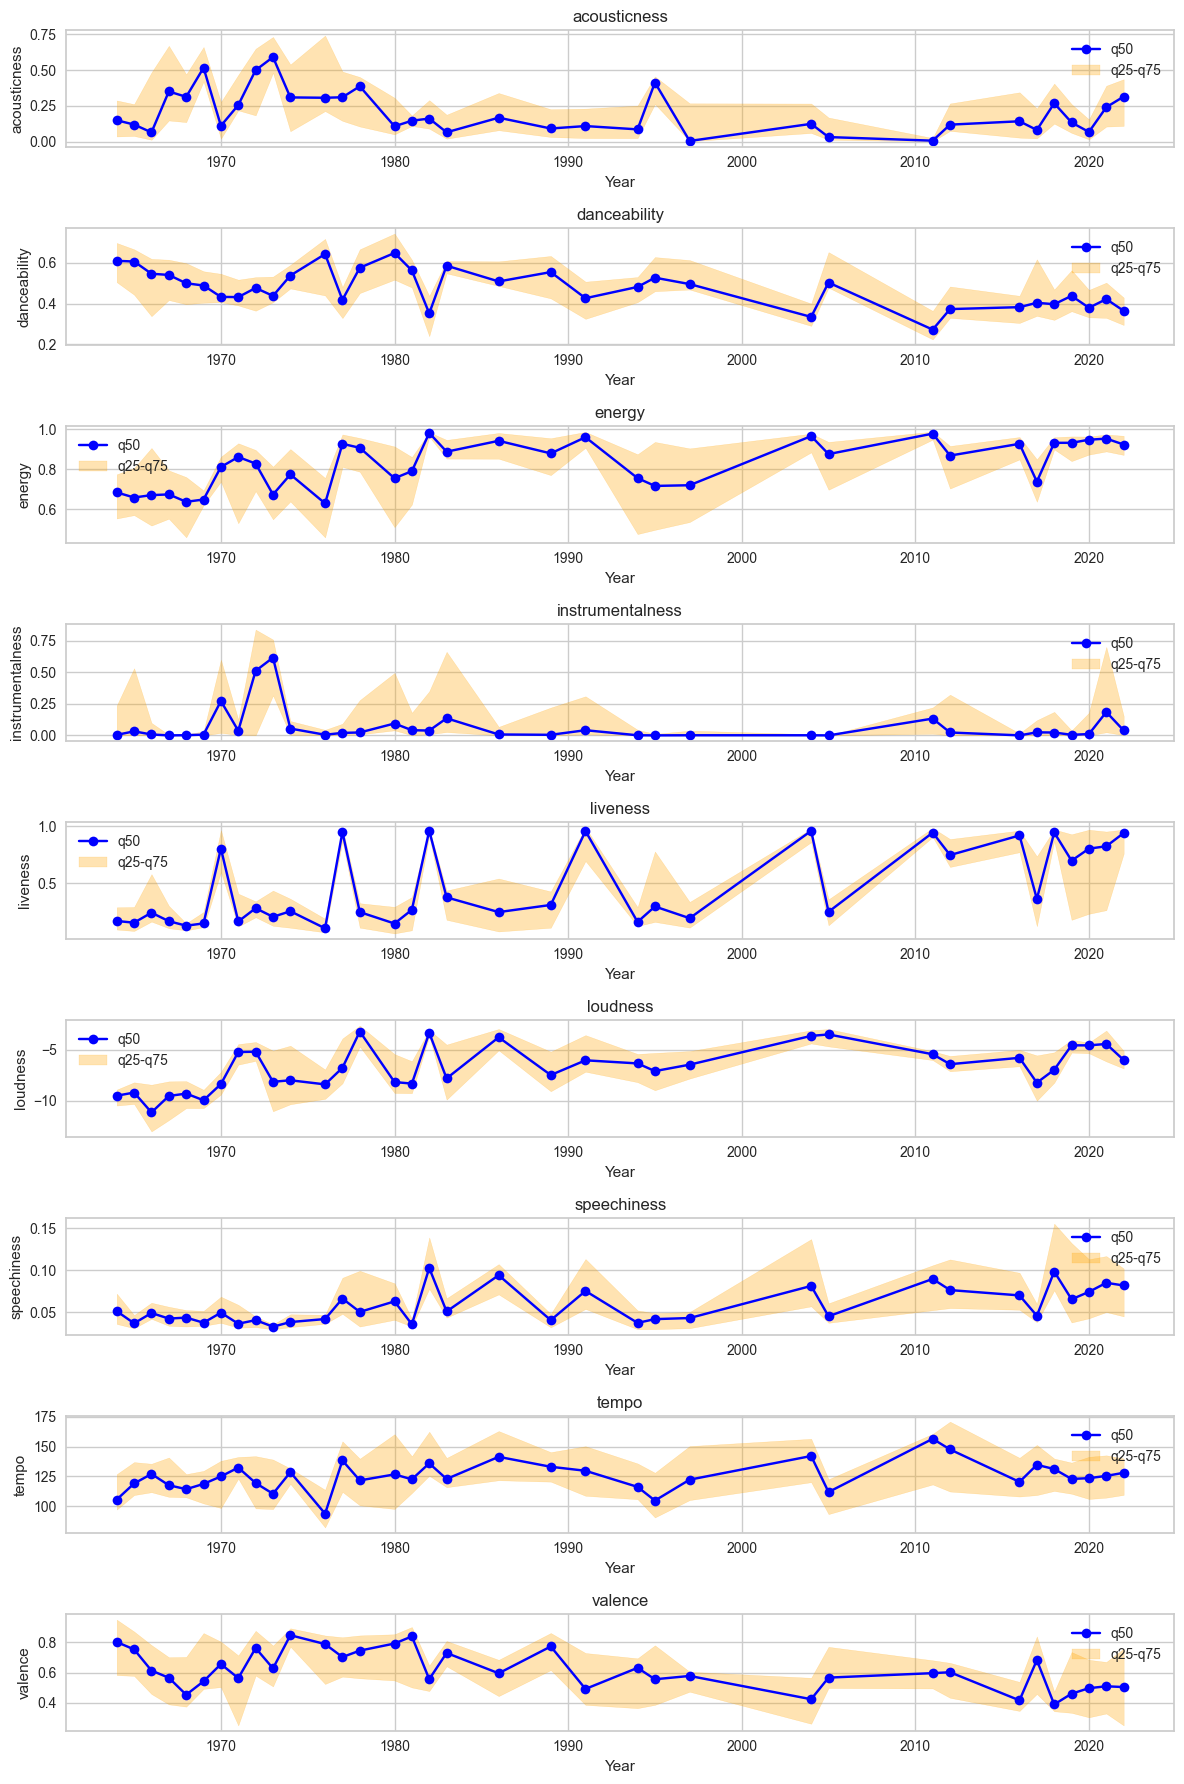

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the features
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                  'speechiness', 'tempo', 'valence']

# Convert 'release_date' to year
df['year'] = pd.to_datetime(df['release_date']).dt.year

# Plot the quantile plot using Matplotlib
num_rows = len(sound_features)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 2*num_rows))

for i, feature in enumerate(sound_features):
    ax = axes[i]
    
    # Calculate quantiles for each year
    quantiles = df.groupby('year')[feature].quantile(q=[0.25, 0.5, 0.75]).unstack()
    
    # Plot q50 as a line with markers
    ax.plot(quantiles.index, quantiles[0.5], label='q50', color='blue', marker='o')
    
    # Plot overlay for q25 and q75
    ax.fill_between(quantiles.index, quantiles[0.25], quantiles[0.75], alpha=0.3, color='orange', label='q25-q75')
    
    ax.set_title(feature)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend()

plt.tight_layout()
plt.show()


### 2.4 Decade level smoothened trend

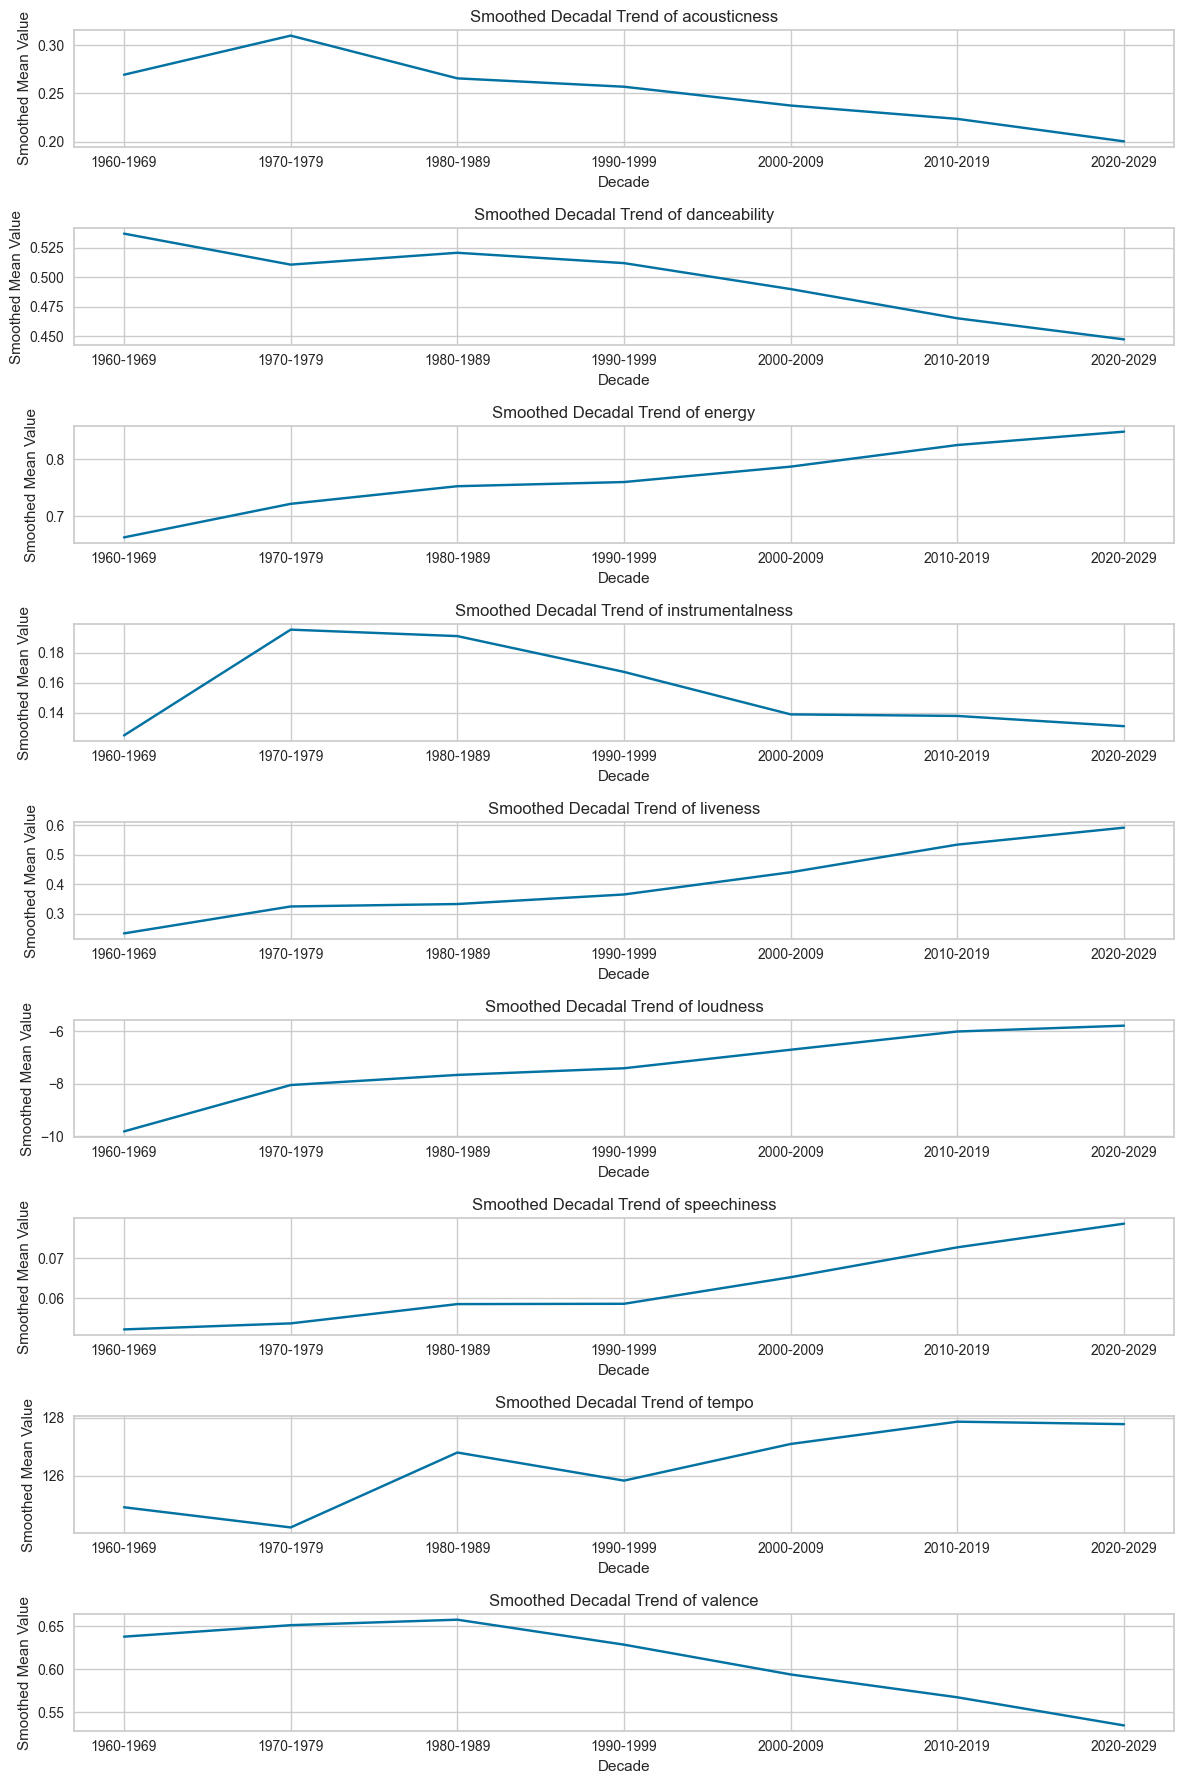

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the features
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                  'speechiness', 'tempo', 'valence']

# Convert 'release_date' to year
df['year'] = pd.to_datetime(df['release_date']).dt.year

# Function to get the decade for a given year
def get_decade(year):
    period_start = int(year / 10) * 10
    return f"{period_start}-{period_start + 9}"

# Assign the decade to each row
df['decade'] = df['year'].apply(get_decade)

# Melt the DataFrame to have 'decade' as a separate column
df_melted = pd.melt(df, id_vars=['decade'], value_vars=sound_features, var_name='feature')

# Create pivot table
pivot_table = df_melted.pivot_table(index='decade', columns='feature', values='value', aggfunc='mean')

# Apply rolling operation
rolling_means = pivot_table.rolling(window=5, min_periods=1).mean()

# Plot the smoothed trend for each feature in subplots
num_features = len(sound_features)
num_rows = num_features
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))

for i, feature in enumerate(sound_features):
    row = i
    col = 0
    ax = axes[row] if num_rows > 1 else axes
    sns.lineplot(data=rolling_means[feature], ax=ax)
    ax.set_xlabel('Decade')
    ax.set_ylabel('Smoothed Mean Value')
    ax.set_title(f'Smoothed Decadal Trend of {feature}')
    ax.grid(True)

plt.tight_layout()
plt.show()


<u> OBSERVATION: </u>

```
Over the decades Acousticness, Danceability & Instrumentalness is in downward trend
Over the decades Energy, Liveness, Loudness, tempo & speechiness are in positive upward trend
```

In [17]:
df = pd.read_csv('rolling_stones_spotify.csv')
columns = df.columns[1:]
# df.index = df['id']
print(columns)

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


# 3. Data Inspection & Data Cleaning

#### 3.1 Clean the albums name

In [18]:
df['album'].sort_values().unique()

array(['12 X 5', '12 x 5', 'A Bigger Bang (2009 Re-Mastered)',
       'A Bigger Bang (Live)', 'Aftermath', 'Aftermath (UK Version)',
       'Beggars Banquet', 'Beggars Banquet (50th Anniversary Edition)',
       'Between The Buttons', 'Between The Buttons (UK Version)',
       'Between The Buttons (US track listing)', 'Black And Blue',
       'Black And Blue (Remastered 2009)', 'Blue & Lonesome',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Bridges To Bremen (Live)', 'Bridges To Buenos Aires (Live)',
       "December's Children (and everybody's)",
       'December’s Children (And Everybody’s)', 'Dirty Work',
       'Dirty Work (Remastered 2009)', 'Emotional Rescue',
       'Emotional Rescue (2009 Re-Mastered)',
       "England's Newest Hit Makers", 'England’s Newest Hitmakers',
       'Exile On Main Street (2010 Re-Mastered)',
       'Exile On Main Street (Bonus Track Version)',
       'Exile On Main Street (Deluxe Version)', 'Flashpoint', 'Flowers',
       '

In [19]:
df['album'].sort_values().nunique()

90

<u> OBSERVATION : </u>

```
"England's Newest Hit Makers",
'England’s Newest Hitmakers',
'12 X 5', '12 x 5'

Same albums, in different format, before we proceed need to streamline the album name
```

In [20]:
import re

# Preprocess the album names
df['album'] = [re.sub(r'[^a-zA-Z0-9\s]', '', album) for album in df['album']]

# Clean and streamline the album names
df['album'] = df['album'].str.lower()  # Convert to lowercase
df['album'] = df['album'].str.strip()  # Remove leading and trailing whitespaces

df = df.drop_duplicates()  # Remove duplicates

In [21]:
df['album'].sort_values().nunique()

87

In [22]:
df = df[['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms']]


#### 3.2 Normalize the data

In [23]:
df_seg = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
         'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'id']]

df_seg.set_index('id', inplace=True)

# normalized  data by columns
df_normalized = pd.DataFrame(normalize(df_seg, axis=1))
df_normalized.columns = df_seg.columns
df_normalized.index = df_seg.index
df_normalized.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
id,,,,,,,,,,,
2IEkywLJ4ykbhi1yRQvmsT,0.000002,9.518884e-06,0.000020,2.047691e-05,0.000019,-0.000265,2.261506e-06,0.002426,6.208862e-07,0.000678,0.999997
6GVgVJBKkGJoRfarYRvGTU,0.000002,1.287657e-06,0.000004,9.203192e-07,0.000004,-0.000019,2.997950e-07,0.000519,1.256058e-06,0.000134,1.000000
1Lu761pZ0dBTGpzxaQoZNW,0.000002,1.466788e-06,0.000004,1.519988e-06,0.000004,-0.000019,4.369964e-07,0.000494,1.189390e-06,0.000129,1.000000
1agTQzOTUnGNggyckEqiDH,0.000002,1.206355e-06,0.000003,3.498103e-10,0.000003,-0.000018,6.309663e-07,0.000435,4.805806e-07,0.000105,1.000000
7piGJR8YndQBQWVXv6KtQw,0.000001,9.930974e-07,0.000003,1.832150e-07,0.000003,-0.000017,3.048121e-07,0.000428,6.751751e-07,0.000105,1.000000


#### 3.3 - Recommended to anyone based on the number of popular songs in an album.

In [24]:
df['album1'] = df.album.apply(lambda x: x[:25])
# Sort values within each group by 'popularity' in descending order
grouped_df_sorted = df[['album1', 'id', 'popularity']].sort_values(by=['album1', 'id', 'popularity'], ascending=[True, False, False])

recent_year_popular_suggestion = df.groupby(['release_date', 'album1'])['popularity'].median().reset_index().sort_values(by=['release_date', 'popularity'], ascending=[False, False])
popular_song_suggestion = df.groupby(['album1'])['popularity'].median().reset_index().sort_values(by=['popularity'], ascending=False)


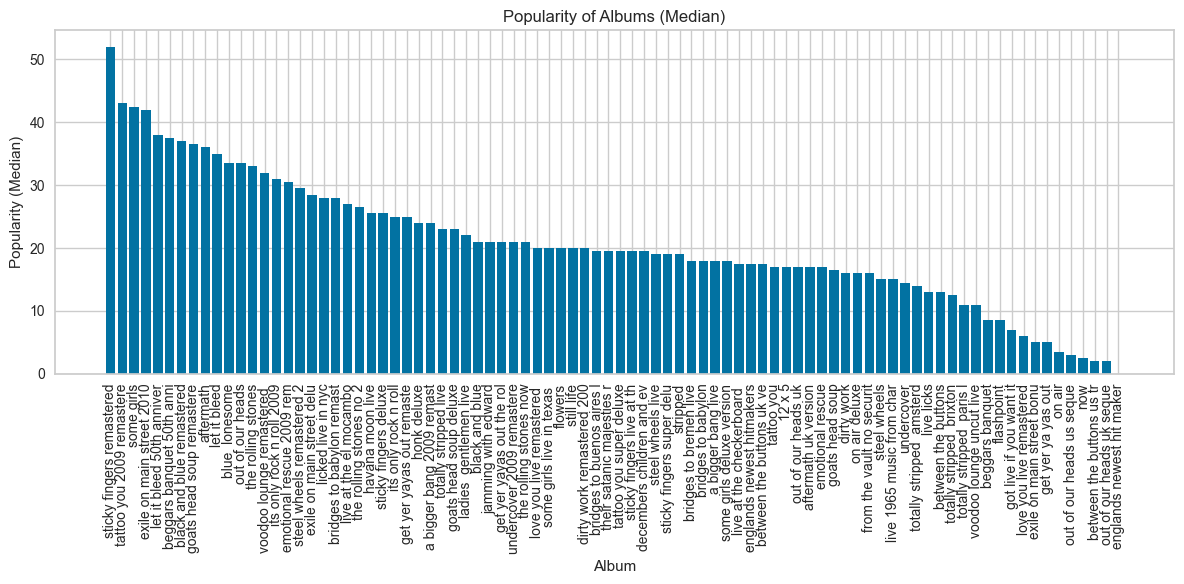

In [25]:
# Plot for popular_song_suggestion
plt.figure(figsize=(12, 6))
plt.bar(popular_song_suggestion['album1'], popular_song_suggestion['popularity'])
plt.title('Popularity of Albums (Median)')
plt.xlabel('Album')
plt.ylabel('Popularity (Median)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
top2_recent_year_popular_suggestion = recent_year_popular_suggestion.head(2)
top2_popular_song_suggestion = popular_song_suggestion.head(2)

print(f"top2_recent_year_popular_suggestion : \n{top2_recent_year_popular_suggestion} \n\ntop2_popular_song_suggestion : \n{top2_popular_song_suggestion}")

top2_recent_year_popular_suggestion : 
   release_date                  album1  popularity
86   2022-06-10      licked live in nyc        28.0
85   2022-05-13  live at the el mocambo        27.0 

top2_popular_song_suggestion : 
                       album1  popularity
67  sticky fingers remastered        52.0
72  tattoo you 2009 remastere        43.0


#### 3.4 - Discover how a song's popularity has changed over time.

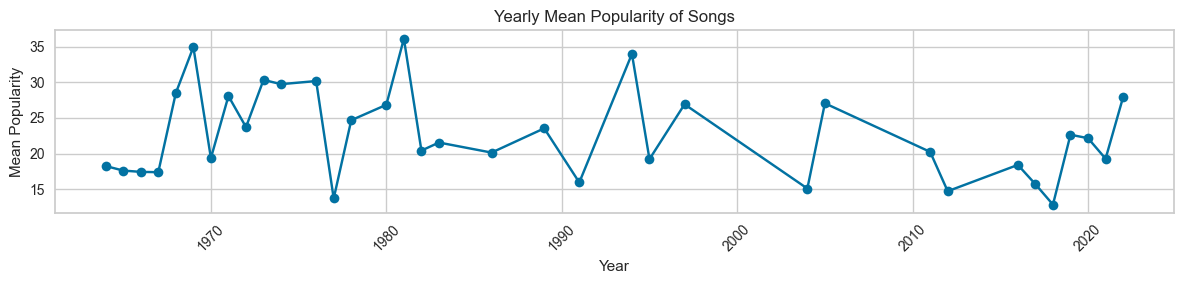

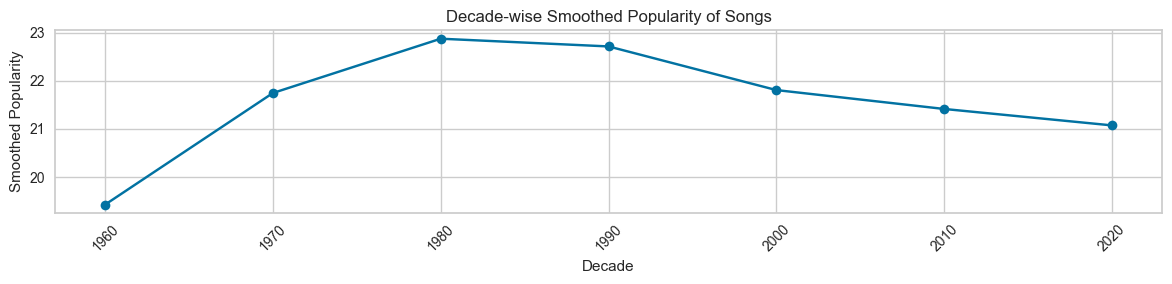

In [27]:
# Extract year from 'release_date'
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
# Calculate yearly mean popularity
yearly_mean_popularity = df.groupby('release_year')['popularity'].mean()

# Plot yearly mean popularity
plt.figure(figsize=(12, 3))
plt.plot(yearly_mean_popularity.index, yearly_mean_popularity.values, marker='o', linestyle='-')
plt.title("Yearly Mean Popularity of Songs")
plt.xlabel("Year")
plt.ylabel("Mean Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
# Extract decade from 'release_date'
df['release_decade'] = (df['release_date'].dt.year // 10) * 10
# Calculate decade-wise mean popularity
decade_mean_popularity = df.groupby('release_decade')['popularity'].mean()

# Smooth the popularity using moving average
window_size = 5  # Adjust the window size for smoothing
smoothed_popularity = decade_mean_popularity.rolling(window=window_size, min_periods=1).mean()

# Plot decade-wise smoothed popularity
plt.figure(figsize=(12, 3))
plt.plot(smoothed_popularity.index, smoothed_popularity.values, marker='o', linestyle='-')
plt.title("Decade-wise Smoothed Popularity of Songs")
plt.xlabel("Decade")
plt.ylabel("Smoothed Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.5 - How a song's popularity relates to various factors

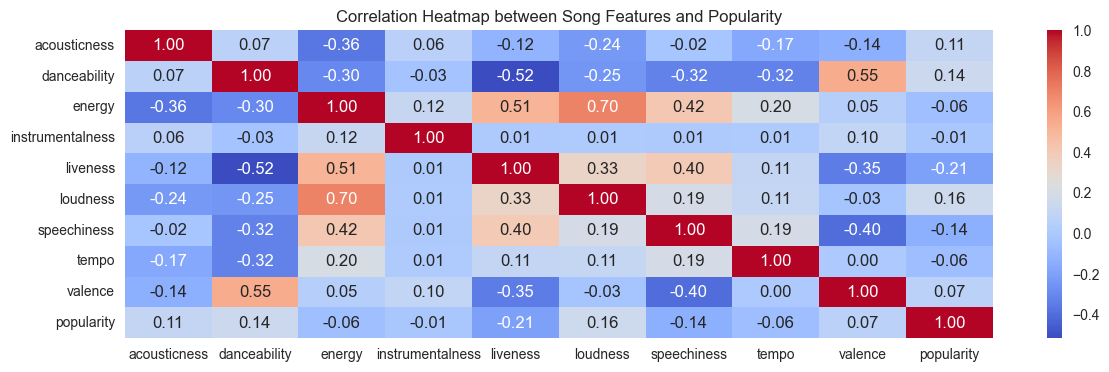

In [28]:
import seaborn as sns

# Correlation analysis
correlation_matrix = df[['acousticness', 'danceability', 'energy', 'instrumentalness',
                         'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(14, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Song Features and Popularity")
plt.show()

<u>OBSERVATION : </u>

```
Liveness, Dancability & Loudness are having little correlation with the popularity.
```

#### 3.6 - Dimensionality Reduction

#### PCA

('acousticness', 0.5812340244911008)
('danceability', 0.15932860058617535)
('energy', 0.08346685983985994)
('instrumentalness', 0.0564194329966513)
('liveness', 0.036915135656258785)
('loudness', 0.030460677813510733)
('speechiness', 0.025975234648724903)
('tempo', 0.016736970009848303)
('valence', 0.009463063957869883)


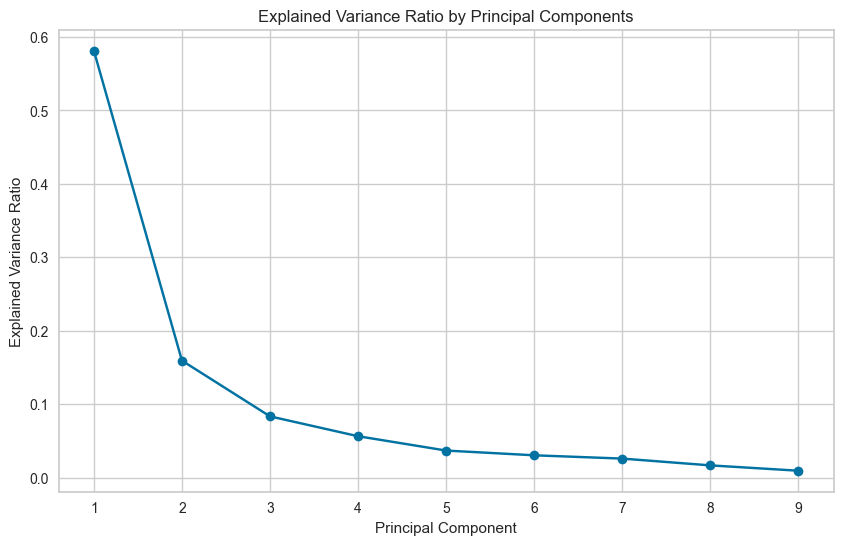

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separating features and target
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df_normalized[features]  # Features
y = df_normalized['popularity']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

for item in dict(zip(features, pca.explained_variance_ratio_)).items():
    print(item)
    
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(features) + 1))
plt.grid(True)
plt.show()



In [30]:
for i, val in enumerate(pca.explained_variance_ratio_):
    print(f"PCA - first {len(pca.explained_variance_ratio_[:i+1])} components explained {pca.explained_variance_ratio_[:i+1].sum()}% variance in the dataset")

PCA - first 1 components explained 0.5812340244911008% variance in the dataset
PCA - first 2 components explained 0.7405626250772762% variance in the dataset
PCA - first 3 components explained 0.8240294849171361% variance in the dataset
PCA - first 4 components explained 0.8804489179137874% variance in the dataset
PCA - first 5 components explained 0.9173640535700462% variance in the dataset
PCA - first 6 components explained 0.9478247313835569% variance in the dataset
PCA - first 7 components explained 0.9737999660322818% variance in the dataset
PCA - first 8 components explained 0.9905369360421301% variance in the dataset
PCA - first 9 components explained 1.0% variance in the dataset


#### TSNE & KMEANS

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px 


cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = df_normalized.select_dtypes(np.number)

cluster_pipeline.fit(X)
df_normalized['cluster'] = cluster_pipeline.predict(X)


tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
data_emb = tsne_pipeline.fit_transform(X)
df_normalized['x'] = data_emb[:, 0]
df_normalized['y'] = data_emb[:, 1]

fig = px.scatter(
    df_normalized, x='x', y='y', color='cluster', hover_data=['x', 'y'], title='t-SNE embedding - Dimensionality Reduction')
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1610 samples in 0.002s...
[t-SNE] Computed neighbors for 1610 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1610
[t-SNE] Computed conditional probabilities for sample 1610 / 1610
[t-SNE] Mean sigma: 0.465913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.094154
[t-SNE] KL divergence after 1000 iterations: 1.134437


### DIMENSIONALITY REDUCTION OBSERVATION:

```
PCA - Based on Principal Component Analysis (PCA), it's evident that utilizing 6 components suffices to elucidate approximately 94% of the variance within the dataset. Consequently, it suggests the presence of 6 optimal clusters within the data.

t-SNE - Utilizing t-distributed Stochastic Neighbor Embedding (t-SNE) can provide valuable insights by visualizing the data's spatial arrangement for each cluster. This visualization aids in determining the correctness of the optimal cluster selection.

This dual approach offers a comprehensive understanding of the data's structure and facilitates informed decision-making regarding cluster optimization.
```


# 4. Clustering Algorithms

In [32]:
df_normalized = df_normalized[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms']]

df_chunk = pd.DataFrame()

for col in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']:
    df_chunk[f'{col}_bin'] = chunk_into_bins(df_normalized[col])
    
df_chunk_normalized = normalize_df(df_chunk)
df_chunk_normalized.index = df_normalized.index

df_normalized = pd.concat([df_chunk_normalized, df_normalized], axis=1)

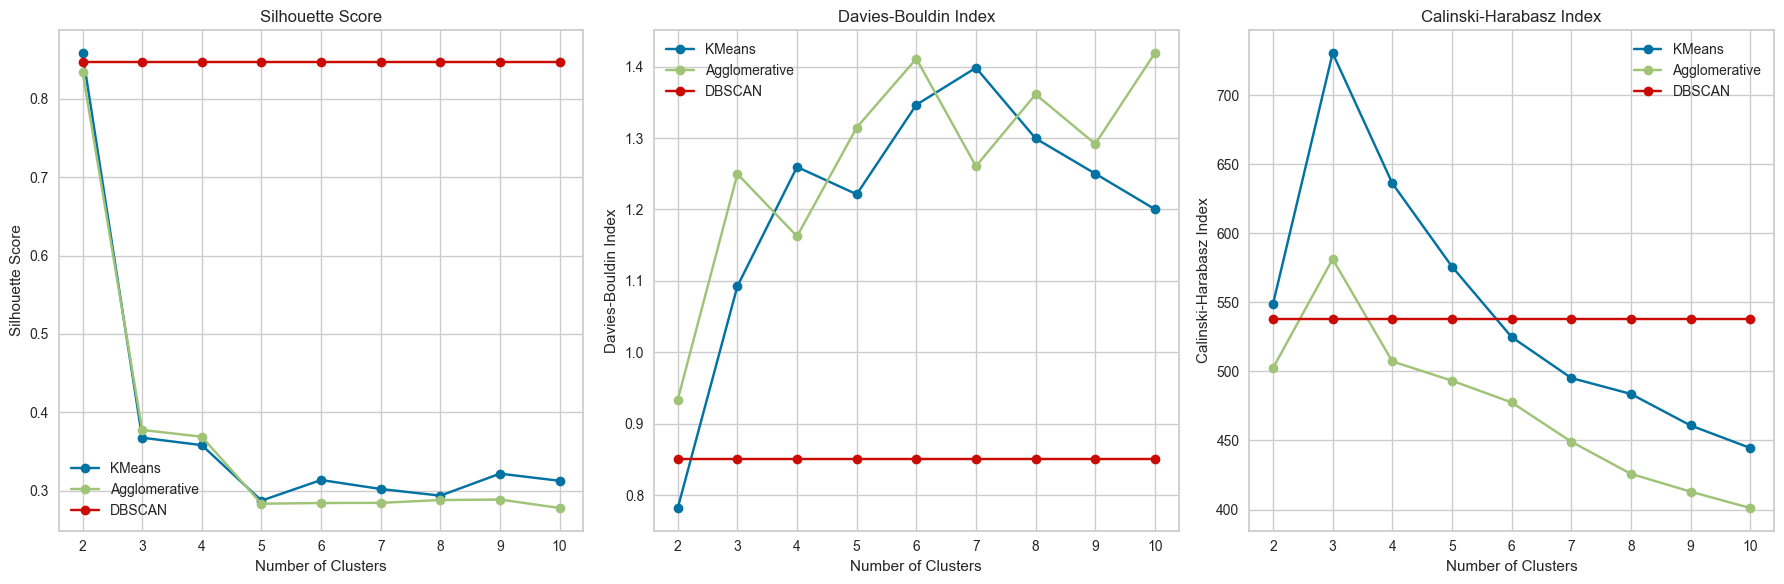

Optimal number of clusters:
{'KMeans': 2, 'Agglomerative': 2, 'DBSCAN': 2}


In [33]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# Define clustering algorithms
algorithms = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'DBSCAN': DBSCAN
}

# Initialize evaluation metric scores
silhouette_scores = {}
davies_bouldin_scores = {}
calinski_harabasz_scores = {}

# Range of cluster numbers to try
n_clusters_range = range(2, 11)

# Iterate over algorithms
for name, algorithm in algorithms.items():
    silhouette_scores[name] = []
    davies_bouldin_scores[name] = []
    calinski_harabasz_scores[name] = []
    
    for n_clusters in n_clusters_range:
        # Initialize and fit the clustering model
        if name == 'Agglomerative':
            clusterer = algorithm(n_clusters=n_clusters)
        elif name == 'DBSCAN':
            clusterer = algorithm(eps=0.5, min_samples=5)
        else:
            clusterer = algorithm(n_clusters=n_clusters, random_state=42)
        
        cluster_labels = clusterer.fit_predict(df_normalized)
        
        # Check if more than one cluster is formed
        if len(np.unique(cluster_labels)) > 1:
            # Calculate evaluation metrics
            silhouette_scores[name].append(silhouette_score(df_normalized, cluster_labels))
            davies_bouldin_scores[name].append(davies_bouldin_score(df_normalized, cluster_labels))
            calinski_harabasz_scores[name].append(calinski_harabasz_score(df_normalized, cluster_labels))
        else:
            # Set scores to NaN if only one cluster formed
            silhouette_scores[name].append(np.nan)
            davies_bouldin_scores[name].append(np.nan)
            calinski_harabasz_scores[name].append(np.nan)

# Plot evaluation metric scores
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
for name, scores in silhouette_scores.items():
    plt.plot(n_clusters_range, scores, marker='o', label=name)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.subplot(1, 3, 2)
for name, scores in davies_bouldin_scores.items():
    plt.plot(n_clusters_range, scores, marker='o', label=name)
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.legend()

plt.subplot(1, 3, 3)
for name, scores in calinski_harabasz_scores.items():
    plt.plot(n_clusters_range, scores, marker='o', label=name)
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()

plt.tight_layout()
plt.show()

# Determine the optimal number of clusters
optimal_clusters = {}
for name, scores in silhouette_scores.items():
    if not np.all(np.isnan(scores)):
        optimal_clusters[name] = np.nanargmax(scores) + 2
    else:
        optimal_clusters[name] = None

print("Optimal number of clusters:")
print(optimal_clusters)

# Train the final model with the optimal number of clusters
final_model = KMeans(n_clusters=optimal_clusters['KMeans'], random_state=42)
final_cluster_labels = final_model.fit_predict(df_normalized)


<u> OBSERVATION: </u>

```
KMEANS performs better than other algorithms
```

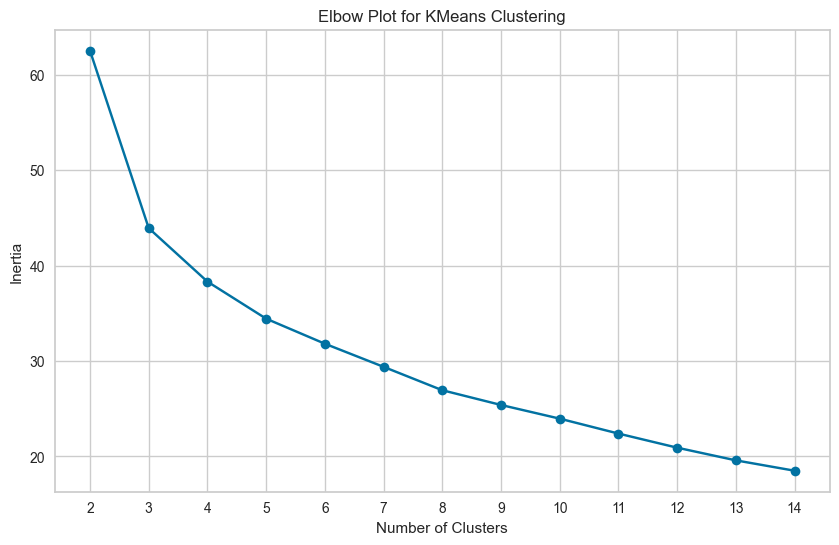

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Range of cluster numbers to try
n_clusters_range = range(2, 15)

# Initialize list to store inertia values
inertia_values = []

# Fit KMeans for each cluster number and store inertia
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_normalized)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()


<u> OBSERVATION : </u>

```
1. It seems elbow shows that 5 would be a optimal cluster.
2. Calinski-Harabasz Index, Silhoutte Score, Davies-Bouldin Index plot showing 5 - 6 would be the optimal cluster.
```

In [35]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Fit KMeans to obtain cluster labels
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_normalized)


import plotly.graph_objs as go

# Create trace for scatter plot
trace = go.Scatter3d(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    z=tsne_results[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',  # Change colorscale to 'Viridis'
        opacity=0.8
    ),
    text=cluster_labels,
    hoverinfo='text'
)

# Create layout
layout = go.Layout(
    title='Interactive 3D t-SNE Visualization of KMeans Clusters',
    scene=dict(
        xaxis=dict(title='t-SNE Component 1'),
        yaxis=dict(title='t-SNE Component 2'),
        zaxis=dict(title='t-SNE Component 3')
    ),
    legend=dict(title='Cluster')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
fig.show()


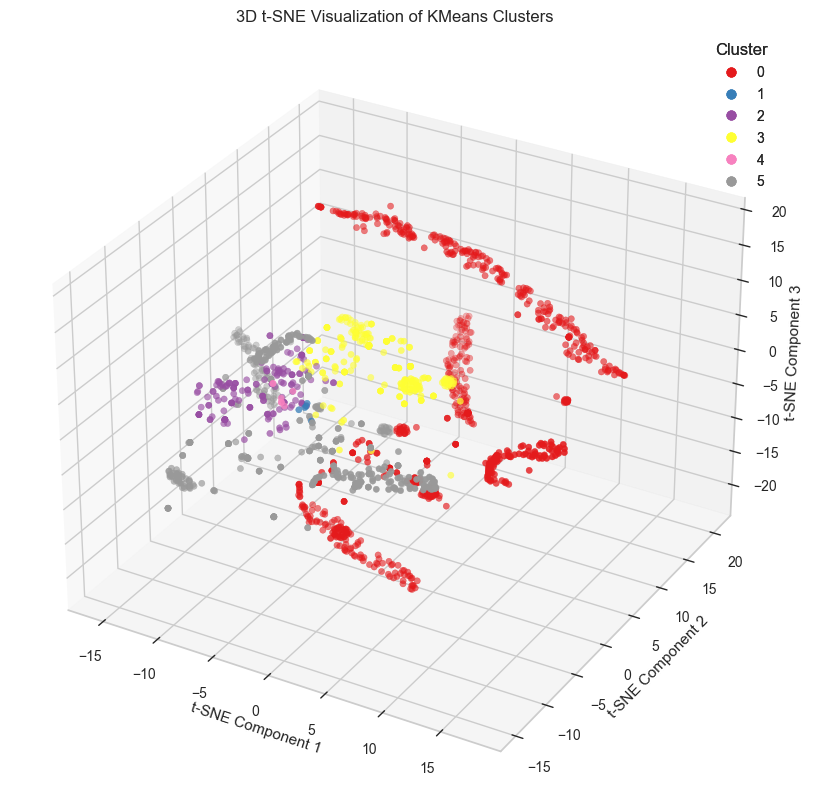

In [36]:
# Plot t-SNE visualization colored by cluster labels in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], c=cluster_labels, cmap='Set1')
ax.set_title('3D t-SNE Visualization of KMeans Clusters')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()

In [37]:
df_normalized['cluster'] = cluster_labels

#### 4.1 - Cluster Analysis

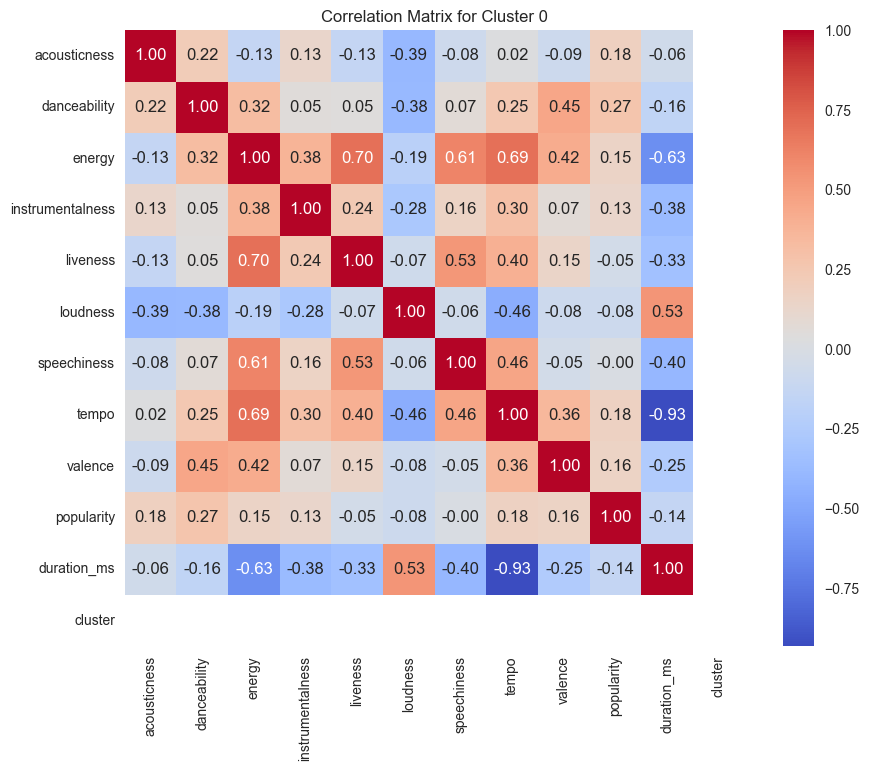

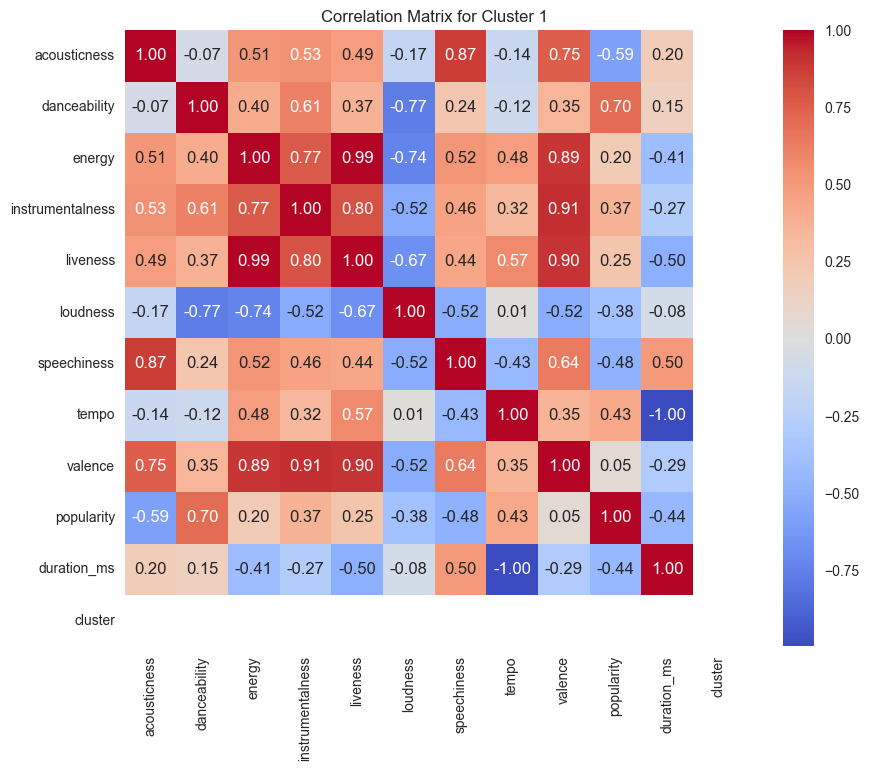

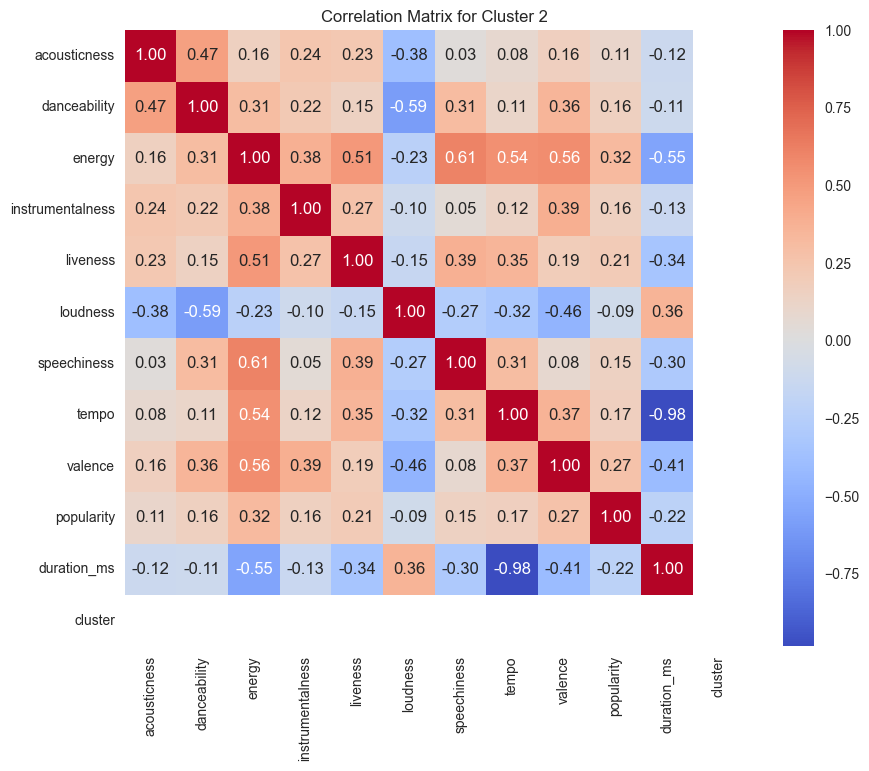

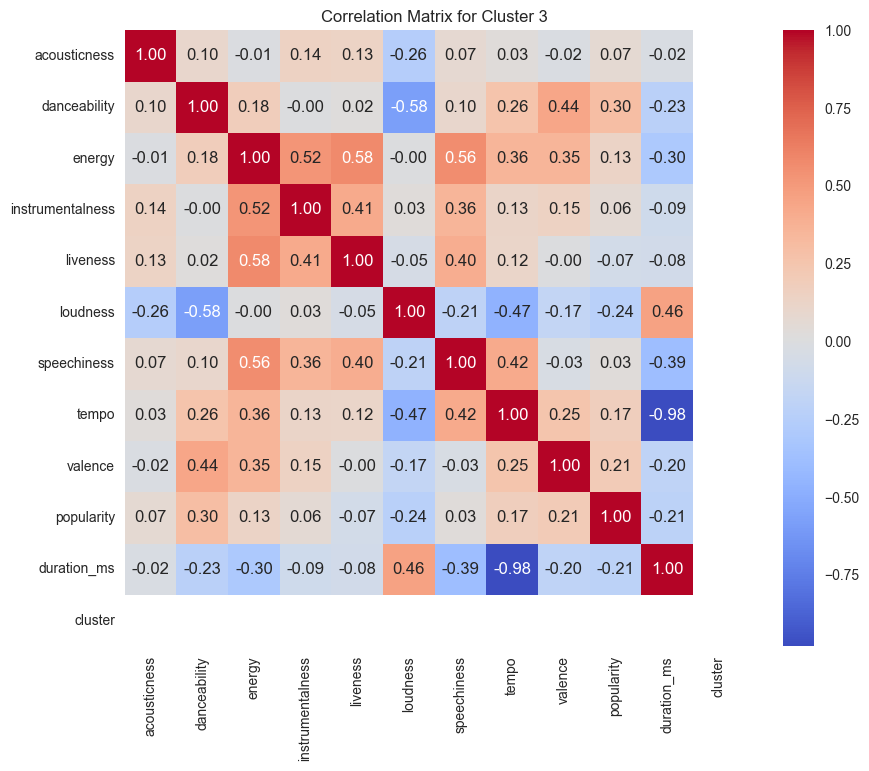

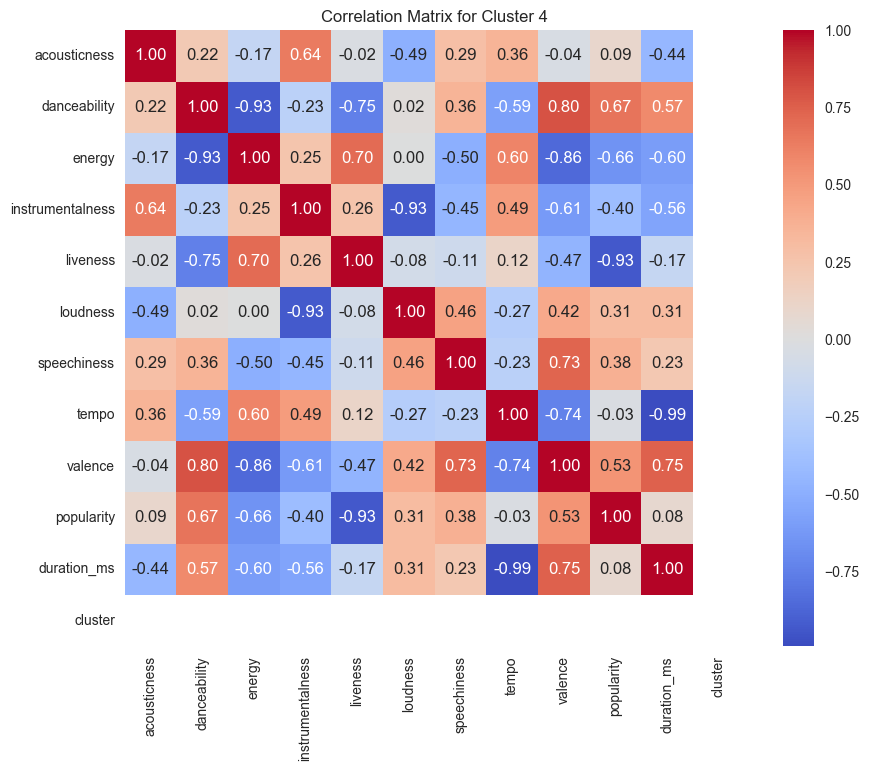

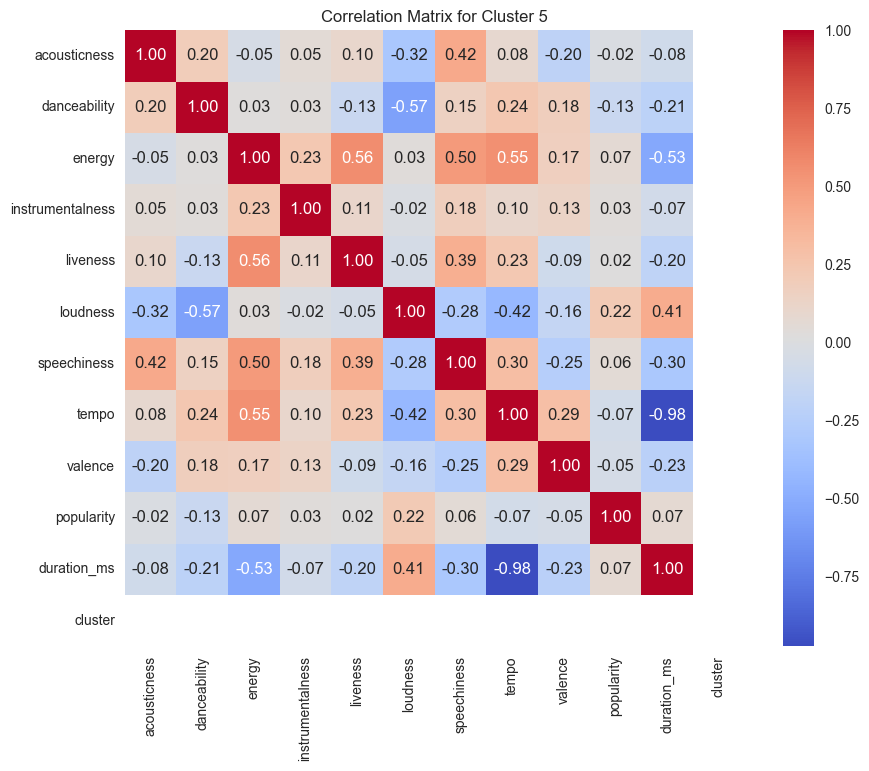

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of features you want to visualize
features_to_visualize = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                         'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
                         'popularity', 'duration_ms', 'cluster']

# Iterate over each cluster
for cl in range(6):
    cl_temp = df_normalized[df_normalized['cluster'] == cl].reset_index(drop=True)
    cl_temp = cl_temp[features_to_visualize].reset_index(drop=True)

    # Compute the correlation matrix
    corr_matrix = cl_temp.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Cluster {cl}')
    plt.show()


<u> OBSERVATION: </u>

```
Here are the summarized insights from the correlation plots for each cluster:

Cluster 0:
- There is a moderate positive correlation between danceability and energy.
- Energy is positively correlated with tempo and speechiness.
- There is a strong positive correlation between energy and loudness.
- Tempo and duration_ms are strongly negatively correlated.

Cluster 1:
- There is a strong positive correlation between danceability and valence.
- Valence is negatively correlated with energy and loudness.
- Acousticness and instrumentalness are strongly positively correlated.
- Liveness is negatively correlated with loudness.

Cluster 2:
- Danceability is positively correlated with valence and energy.
- Energy is positively correlated with tempo and speechiness.
- Loudness is negatively correlated with danceability and valence.
- There is a strong negative correlation between duration_ms and tempo.

Cluster 3:
- Energy and speechiness are positively correlated.
- Tempo is negatively correlated with duration_ms.
- Valence is positively correlated with danceability.

Cluster 4:
- Danceability and valence are strongly positively correlated.
- Loudness is negatively correlated with danceability and energy.
- There is a strong negative correlation between tempo and duration_ms.

Cluster 5:
- Speechiness and acousticness are positively correlated.
- Energy is positively correlated with tempo.
- Danceability and valence are positively correlated.
- There is a strong negative correlation between tempo and duration_ms.
```

In [39]:
df_normalized[features_to_visualize].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
count,1.610000e+03,1.610000e+03,1.610000e+03,1.610000e+03,1.610000e+03,1610.000000,1.610000e+03,1610.000000,1610.000000,1610.000000,1.610000e+03,1610.000000
mean,1.181927e-06,2.188101e-06,3.585759e-06,9.255862e-07,2.121189e-06,-0.000035,3.235796e-07,0.000578,0.000003,0.000091,9.999998e-01,2.020497
std,2.031941e-06,1.361472e-06,2.260851e-06,2.445585e-06,2.291318e-06,0.000048,4.777480e-07,0.000361,0.000002,0.000067,7.196878e-07,2.139382
min,4.843951e-11,3.023271e-07,7.311070e-07,0.000000e+00,7.885484e-08,-0.000862,5.355837e-08,0.000108,0.000000,0.000000,9.999809e-01,0.000000
25%,2.377626e-07,1.303083e-06,2.535821e-06,8.737148e-10,7.032751e-07,-0.000044,1.542709e-07,0.000391,0.000001,0.000045,9.999998e-01,0.000000
50%,7.686344e-07,1.884835e-06,3.352645e-06,5.126488e-08,1.728295e-06,-0.000024,2.253810e-07,0.000519,0.000002,0.000078,9.999999e-01,2.000000
75%,1.578683e-06,2.791636e-06,4.195496e-06,7.228592e-07,3.045731e-06,-0.000016,3.447544e-07,0.000686,0.000004,0.000119,9.999999e-01,5.000000
max,4.057065e-05,1.682296e-05,4.142778e-05,4.166587e-05,3.565001e-05,-0.000004,1.016813e-05,0.006115,0.000016,0.000678,1.000000e+00,5.000000


# 5 - Content Based (Relevant-Retreival) Algorithm

In [40]:
from scipy.spatial.distance import cosine
import pandas as pd


def content_filter_music_recommender(song_id, N, distance_method=cosine):
    # Filter out the song with the given ID
    all_songs = df_seg.reset_index()[df_seg.reset_index()['id'] != '2IEkywLJ4ykbhi1yRQvmsT'].copy()
    # Calculate distances
    all_songs['distance'] = all_songs.apply(lambda x: distance_method(df_normalized.loc[song_id], df_normalized.loc[x['id']]), axis=1)
    # Sort by distance then song ID
    top_n_recommendation = all_songs.sort_values(['distance', 'id']).head(N)
    
    # Retrieve song names
    recommendation = pd.merge(top_n_recommendation, df, how='inner', on='id')
    song_names = recommendation
    
    return song_names

# Replace song_id with the ID of the song you want recommendations for, and N with the number of recommendations desired.
recommendations = content_filter_music_recommender('2IEkywLJ4ykbhi1yRQvmsT', 3)

for rec in recommendations[['id', 'release_decade', 'album', 'distance', 'popularity_y']].itertuples():
    print(f"decade : {rec[2]}, \talbum :{rec[3]}, \ndistance {rec[4]}\n")

decade : 2010, 	album :ladies  gentlemen live, 
distance 0.06158580029070637

decade : 1980, 	album :still life, 
distance 0.08218916359968353

decade : 2020, 	album :tattoo you super deluxe, 
distance 0.1205149641192843



# 6 - Conclusion

```
KMEANS algorithm got slected based on metrics.

It shown optimal cluster size is 6, PCA also confirms the same.

DEFINITION OF EACH CLUSTER: 

    Here are the major influencing factors about each cluster with respect to popularity:

    **Cluster 0:** Tempo and energy levels significantly influence popularity within this cluster.

    **Cluster 1:** Danceability and valence play a crucial role in determining popularity in this cluster.

    **Cluster 2:** Energy, tempo, and speechiness are key factors affecting popularity within this cluster.

    **Cluster 3:** Speechiness and tempo have a notable impact on popularity in this cluster.

    **Cluster 4:** Danceability and valence are major influencers of popularity within this cluster.

    **Cluster 5:** Acousticness and speechiness are significant factors affecting popularity in this cluster.

```